In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(0, 100, 1000) # Generate 1000 points from 0 to 100
y = np.sin(x / 10) * np.exp(-x / 20) + np.cos(x / 10) * np.exp(-x / 20) # Create a damped oscillation
y = y + np.random.normal(0, 0.2, size=len(x)) # Add some noise

In [5]:
data_dict = {
    "timestamp" : [float(i) for i in x],
    "value" : [round(v, 2) for v in y]
}

In [13]:
with open("data.json", "w") as f:
    json.dump(data_dict, f) # Save the data to a JSON file

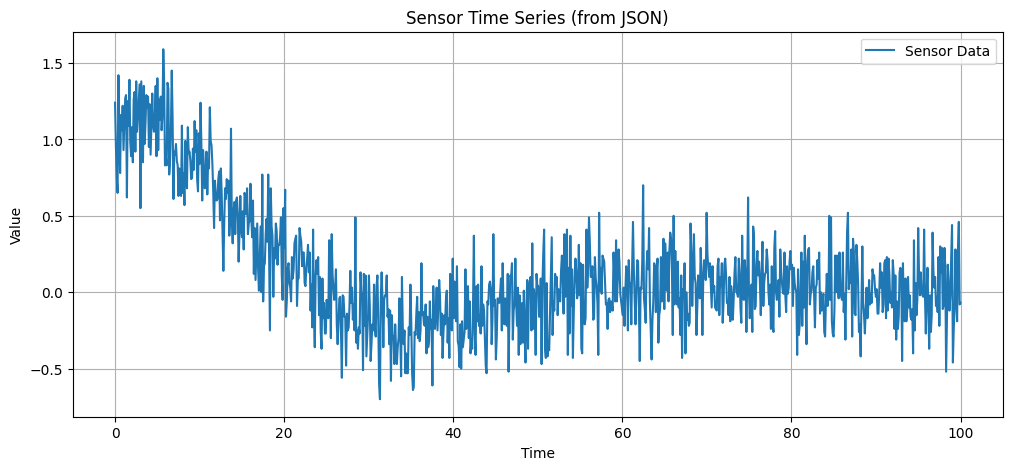

In [14]:
with open('data.json', 'r') as f:
    data = json.load(f)
    
y = data['value']
x = data['timestamp'] if 'timestamp' in data else list(range(len(y)))

# 시각화
plt.figure(figsize=(12, 5))
plt.plot(x, y, label='Sensor Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Sensor Time Series (from JSON)')
plt.grid(True)
plt.legend()
plt.show()

In [22]:
# 시드 고정
np.random.seed(0)

# 샘플 개수
n = 3000
t = np.linspace(0, 100, n)  # 시간축

# 서로 다른 주파수와 진폭의 sin 파형 생성
frequencies = [10, 30, 50, 70, 120]  # Hz 단위 (상대적)
amplitudes = [1.0, 0.5, 0.3, 0.2, 0.1]

# 각 파형을 합산
signal = sum(a * np.sin(2 * np.pi * f * t) for a, f in zip(amplitudes, frequencies))

# 노이즈 추가
noise = 0.2 * np.random.randn(n)
signal_with_noise = signal + noise

# JSON 형태로 저장할 딕셔너리
data = {
    "timestamp": t.tolist(),
    "value": signal_with_noise.tolist()
}

# 파일 저장
json_path = "datas.json"
with open(json_path, "w") as f:
    json.dump(data, f, indent=2)


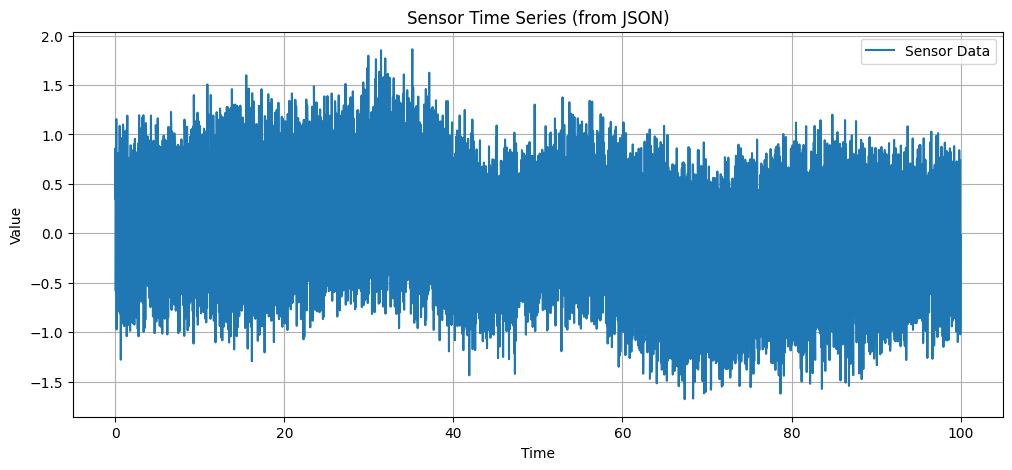

In [24]:
with open('datas.json', 'r') as f:
    data = json.load(f)
    
y = data['value']
x = data['timestamp'] if 'timestamp' in data else list(range(len(y)))

plt.figure(figsize=(12, 5))
plt.plot(x, y, label='Sensor Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Sensor Time Series (from JSON)')
plt.grid(True)
plt.legend()
plt.show()
